In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### An example about using matrix in solving problems.
$$
M = \begin{bmatrix}
0.9 & 0.3 \\
0.1 & 0.7 \\
\end{bmatrix}$$

In [11]:
M = np.array([[0.9,0.3],[0.1,0.7]])
print(M)

[[0.9 0.3]
 [0.1 0.7]]


#### This matrix is conserved

In [38]:
print(M[0,0]+M[1,0]==1)
print(M[0,1]+M[1,1]==1)

True
True


#### Muliplied by itself 10 times

In [13]:
np.linalg.matrix_power(M,10)

array([[0.75151165, 0.74546504],
       [0.24848835, 0.25453496]])

#### 100 times!

In [14]:
np.linalg.matrix_power(M,100)

array([[0.75, 0.75],
       [0.25, 0.25]])

#### How does the muliplication result evolve.

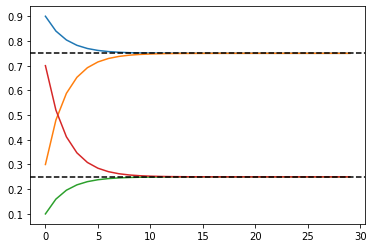

In [23]:
matrices = []
num = 30
for i in range(num):
    matrices.append(np.linalg.matrix_power(M,i+1))
plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices])
plt.axhline(y=0.75,linestyle='--',c='k')
plt.axhline(y=0.25,linestyle='--',c='k')

#### A different plot

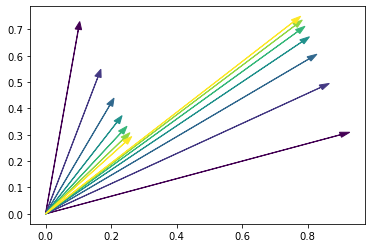

In [36]:
num_toplot = 7
colors=cm.viridis(np.linspace(0,1,num_toplot))
[plt.arrow(0,0,mat[0,0],mat[0,1],head_width=0.02,color=c) for mat,c in zip(matrices[:num_toplot],colors)]
[plt.arrow(0,0,mat[1,0],mat[1,1],head_width=0.02,color=c) for mat,c in zip(matrices[:num_toplot],colors)]

#### We define a new matrix which has one more constraint
$$
M = \begin{bmatrix}
1-\beta/2 & \beta/2 \\
\beta/2 & 1-\beta/2 \\
\end{bmatrix}$$

In [55]:
beta = 0.1
Mbeta = np.array([[1-beta/2,beta/2],[beta/2,1-beta/2]])
print(Mbeta)

[[0.95 0.05]
 [0.05 0.95]]


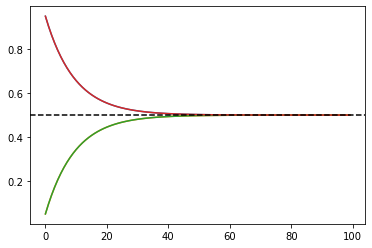

In [56]:
matrices = []
num = 100
for i in range(num):
    matrices.append(np.linalg.matrix_power(Mbeta,i+1))
plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices])
plt.axhline(y=0.5,linestyle='--',c='k')

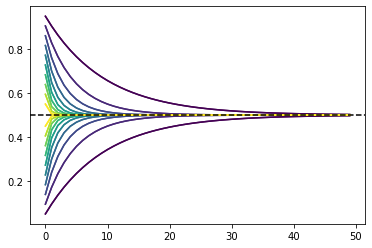

In [58]:
colors=cm.viridis(np.linspace(0,1,10))
for i, beta in enumerate(np.linspace(0.1,0.9,10)):
    color=colors[i]
    Mbeta = np.array([[1-beta/2,beta/2],[beta/2,1-beta/2]])
    matrices = []
    num = 50
    for i in range(num):
        matrices.append(np.linalg.matrix_power(Mbeta,i+1))
    plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices],color=color)
plt.axhline(y=0.5,linestyle='--',c='k')

### Build a MINIMUM scattering model

#### Visualize your Edge

First five scattering events:
[[0.  1.  0.5]
 [0.  1.  0.5]
 [2.  3.  0.8]
 [0.  1.  0.5]
 [0.  1.  0.5]]
The transformation matrix:
[[0.25721391 0.26476252 0.16927058 0.30875299 0.        ]
 [0.3382948  0.34926496 0.16642217 0.14601808 0.        ]
 [0.20216166 0.19291519 0.33223881 0.27268434 0.        ]
 [0.20232963 0.19305734 0.33206844 0.27254459 0.        ]
 [0.         0.         0.         0.         1.        ]]
Visualize the entire edge:


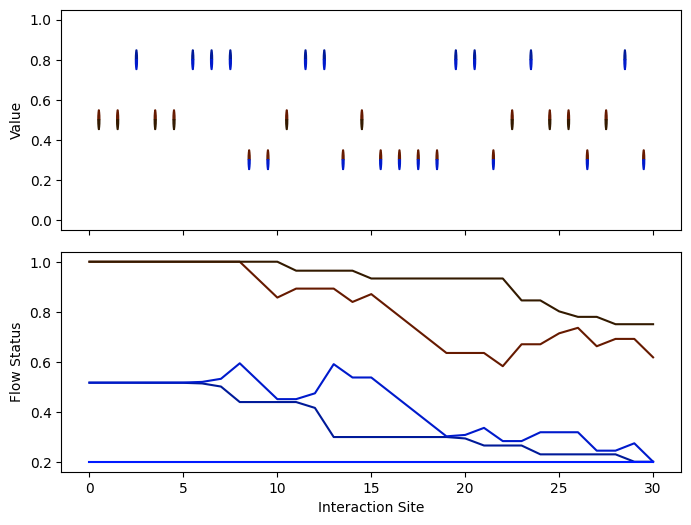

In [2]:
from allscatter import *
import numpy as np
import matplotlib.pyplot as plt
#===============================================================
# General information for the edge - Superparameters
totalNumMover = 5
numForwardMover = 2
initStates = [1,1,0.2,0.2,0.2]
#===============================================================
# Information of scattering events 
# Interaction parameters
v03 = 0.3
v01 = 0.5
v23 = 0.8
edgeDef = [[0,3,v03,10],[0,1,v01,10],[2,3,v23,10]]
edgeInfo = generate_bynumber(edgeDef)
edge = Edge(edgeInfo,totalNumMover,numForwardMover)
print("====================================================================")
print("First five scattering events:")
print(edge.get_seq()[:5])
print("====================================================================")
print("The transformation matrix:")
print(edge.trans_mat())
print("====================================================================")
print("Visualize the entire edge:")
ax1,ax2 = edge.plot(initStates)

#### Visualize your System

#### Build  $\nu=+2$ Quantum Hall system

The transformation matrix between C1 and C2:
[[0.50048828 0.49951172]
 [0.49951172 0.50048828]]
Corresponding matrix for this system:
[[ 2. -0.  0.  0.  0. -2.]
 [-2.  2. -0.  0.  0.  0.]
 [ 0. -2.  2. -0.  0.  0.]
 [ 0.  0. -2.  2. -0.  0.]
 [ 0.  0.  0. -2.  2. -0.]
 [-0.  0.  0.  0. -2.  2.]]
Its determinant is 0.0
Its solutions for all terminal voltages:
[5.00000000e-01 5.00000000e-01 5.00000000e-01 0.00000000e+00
 1.66533454e-16 1.66533454e-16]


C:\gitproj\Counterfusion\allscatter.py:108: UserWarning: Your matrix is singular. `np.linalg.lstsq` is used to find an approximate solution.
  warnings.warn("Your matrix is singular. `np.linalg.lstsq` is used to find an approximate solution.")


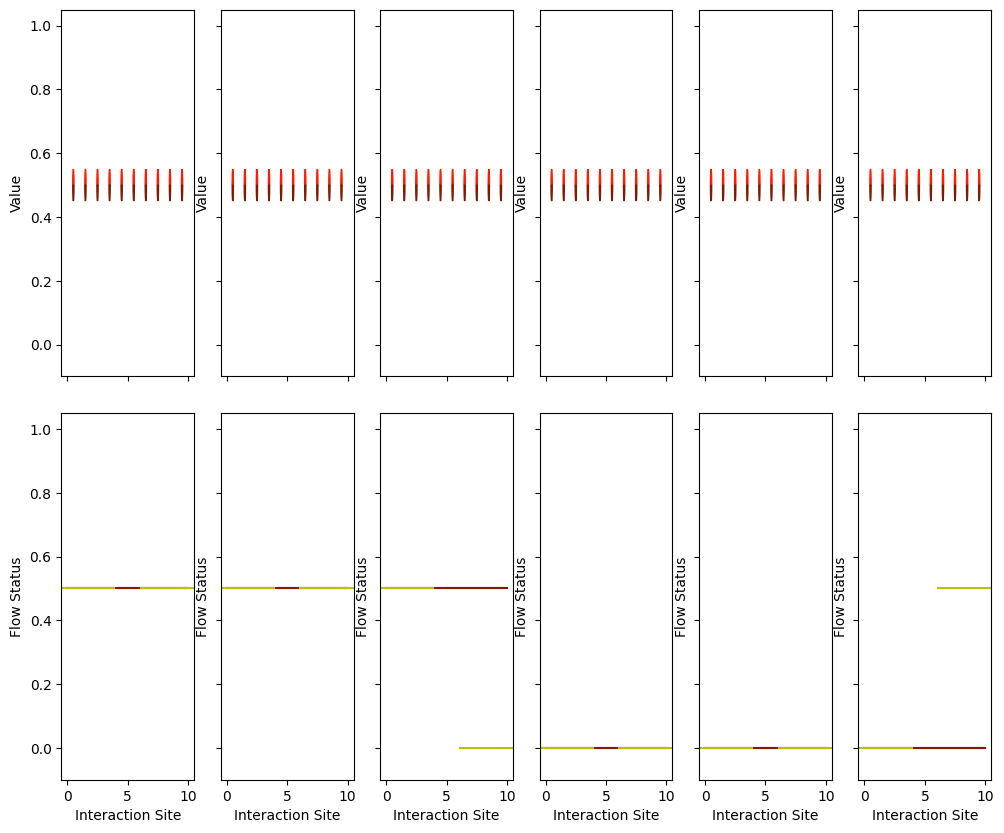

In [8]:
from allscatter import *
import numpy as np
import matplotlib.pyplot as plt

# Define a six-terminal system
# C1--M1--C2--M2--C3--M3--C4--M4--C5--M5--C6--M6--C1
# Total number of edge states: 2
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 0
#===============================================================
# General information for the system - Superparameters
totalNumMover = 2
numForwardMover = 2
zeroVoltTerminal = 3
#===============================================================
# Information of scattering events 
# Interaction parameters
v01 = 0.5
# Define interaction between nodes (contacts)
# C1--M1--C2
edgeDef1 = [[0,1,v01,10]]
# C2--M2--C3
edgeDef2 = [[0,1,v01,10]]
# C3--M3--C4
edgeDef3 = [[0,1,v01,10]]
# C4--M4--C5
edgeDef4 = [[0,1,v01,10]]
# C5--M5--C6
edgeDef5 = [[0,1,v01,10]]
# C6--M6--C1
edgeDef6 = [[0,1,v01,10]]
#================================================================
edgesDef = [edgeDef1,edgeDef2,edgeDef3,edgeDef4,edgeDef5,edgeDef6]
edgesInfo = []
for edgeDef in edgesDef:
    edgesInfo.append(generate_bynumber(edgeDef))

graph = []
for edgeInfo in edgesInfo:
    graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))

print("The transformation matrix between C1 and C2:")
print(graph[0].trans_mat())
print("===========================================================")   
nodesCurrent = [1,0,0,-1,0,0]
sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal)
#================================================================
# Your system has been defined, let us make some fun out of it.
print("Corresponding matrix for this system:")
print(sys.mastermat())
print("Its determinant is", np.linalg.det(sys.mastermat()))
print("===========================================================")
print("Its solutions for all terminal voltages:")
print(sys.solve())
axs=sys.plot()

#### Build  $\nu=-4$ Quantum Hall system 

The transformation matrix between C1 and C2:
[[0.50048828 0.         0.49951172 0.        ]
 [0.         0.67433922 0.         0.32566078]
 [0.49951172 0.         0.50048828 0.        ]
 [0.         0.32566078 0.         0.67433922]]
Corresponding matrix for this system:
[[ 4. -4.  0.  0.  0. -0.]
 [-0.  4. -4.  0.  0.  0.]
 [ 0. -0.  4. -4.  0.  0.]
 [ 0.  0. -0.  4. -4.  0.]
 [ 0.  0.  0. -0.  4. -4.]
 [-4.  0.  0.  0. -0.  4.]]
Its determinant is 5.91171556152402e-12
Its solutions for all terminal voltages:
[2.50000000e-01 8.32667268e-17 2.77555756e-17 0.00000000e+00
 2.50000000e-01 2.50000000e-01]


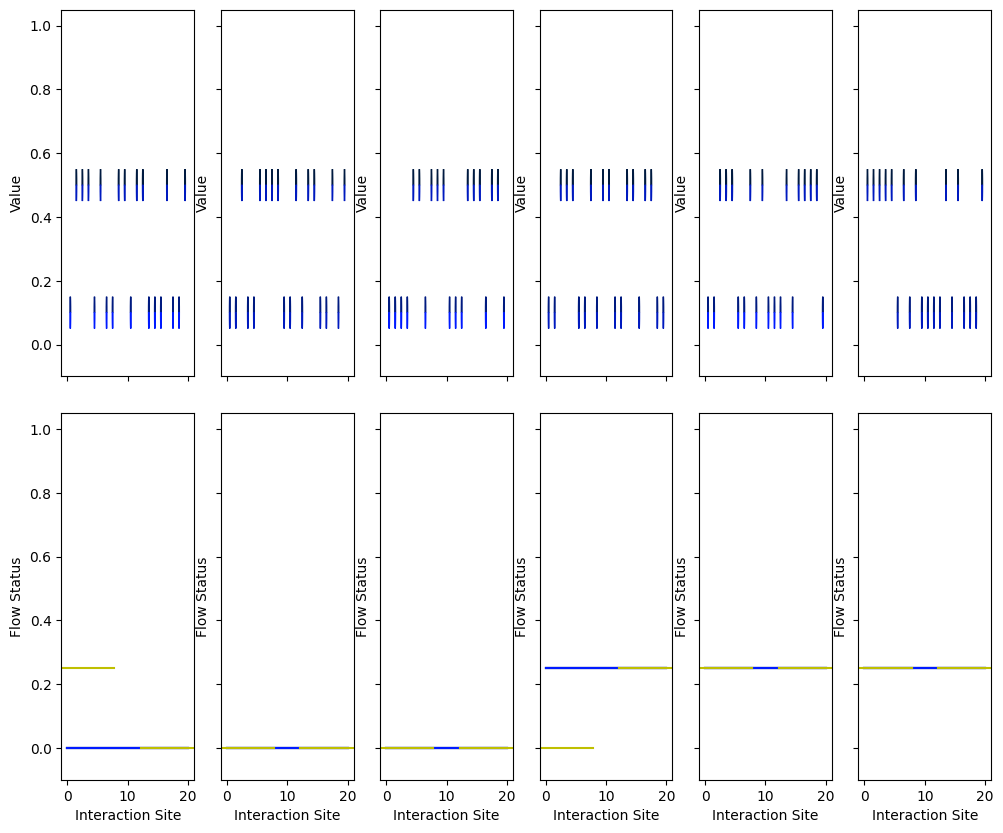

In [9]:
from allscatter import *
import numpy as np
import matplotlib.pyplot as plt

# Define a six-terminal system
# C1--M1--C2--M2--C3--M3--C4--M4--C5--M5--C6--M6--C1
# Total number of edge states: 4
# Number of forward-moving edge states: 0
# Number of backward-moving edge states: 4 (#0,#1,#2,#3)
#===============================================================
# General information for the system - Superparameters
totalNumMover = 4
numForwardMover = 0
zeroVoltTerminal = 3
#===============================================================
# Information of scattering events 
# Interaction parameters
v02 = 0.5
v13 = 0.1
# Define interaction between nodes (contacts)
# C1--M1--C2
edgeDef1 = [[0,2,v02,10],[1,3,v13,10]]
# C2--M2--C3
edgeDef2 = [[0,2,v02,10],[1,2,v13,10]]
# C3--M3--C4
edgeDef3 = [[0,2,v02,10],[1,3,v13,10]]
# C4--M4--C5
edgeDef4 = [[0,2,v02,10],[1,2,v13,10]]
# C5--M5--C6
edgeDef5 = [[0,2,v02,10],[1,3,v13,10]]
# C6--M6--C1
edgeDef6 = [[0,2,v02,10],[1,2,v13,10]]
#================================================================
edgesDef = [edgeDef1,edgeDef2,edgeDef3,edgeDef4,edgeDef5,edgeDef6]
edgesInfo = []
for edgeDef in edgesDef:
    edgesInfo.append(generate_bynumber(edgeDef))

graph = []
for edgeInfo in edgesInfo:
    graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))

print("The transformation matrix between C1 and C2:")
print(graph[0].trans_mat())
print("===========================================================")   
nodesCurrent = [1,0,0,-1,0,0]
sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal)
#================================================================
# Your system has been defined, let us make some fun out of it.
print("Corresponding matrix for this system:")
print(sys.mastermat())
print("Its determinant is", np.linalg.det(sys.mastermat()))
print("===========================================================")
print("Its solutions for all terminal voltages:")
print(sys.solve())
axs=sys.plot()

#### Build non-interacting counter-propagating edge states 

The transformation matrix between C1 and C2:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Corresponding matrix for this system:
[[ 4. -2.  0.  0.  0. -2.]
 [-2.  4. -2.  0.  0.  0.]
 [ 0. -2.  4. -2.  0.  0.]
 [ 0.  0. -2.  4. -2.  0.]
 [ 0.  0.  0. -2.  4. -2.]
 [-2.  0.  0.  0. -2.  4.]]
Its determinant is 0.0
Its solutions for all terminal voltages:
[0.75 0.5  0.25 0.   0.25 0.5 ]


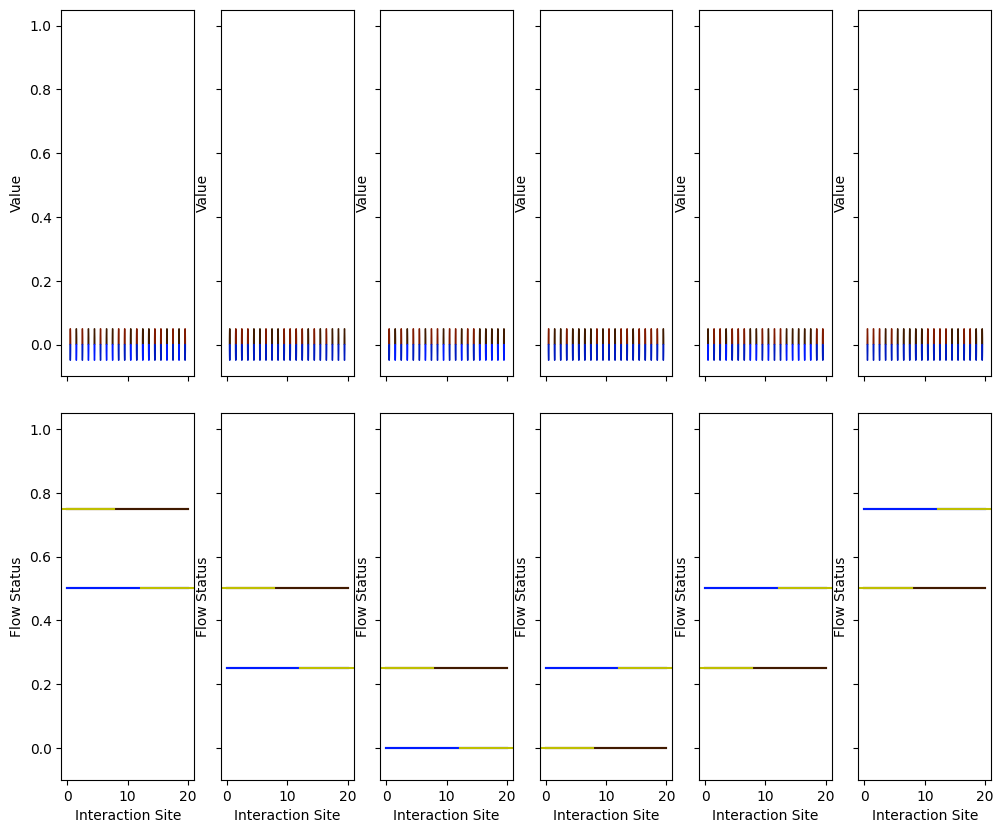

In [10]:
from allscatter import *
import numpy as np
import matplotlib.pyplot as plt

# Define a six-terminal system
# C1--M1--C2--M2--C3--M3--C4--M4--C5--M5--C6--M6--C1
# Total number of edge states: 4
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 2 (#2,#3)
#===============================================================
# General information for the system - Superparameters
totalNumMover = 4
numForwardMover = 2
zeroVoltTerminal = 3
#===============================================================
# Information of scattering events 
# Interaction parameters
v02 = 0
v13 = 0
# Define interaction between nodes (contacts)
# C1--M1--C2
edgeDef1 = [[0,2,v02,10],[1,3,v13,10]]
# C2--M2--C3
edgeDef2 = [[0,2,v02,10],[1,2,v13,10]]
# C3--M3--C4
edgeDef3 = [[0,2,v02,10],[1,3,v13,10]]
# C4--M4--C5
edgeDef4 = [[0,2,v02,10],[1,2,v13,10]]
# C5--M5--C6
edgeDef5 = [[0,2,v02,10],[1,3,v13,10]]
# C6--M6--C1
edgeDef6 = [[0,2,v02,10],[1,2,v13,10]]
#================================================================
edgesDef = [edgeDef1,edgeDef2,edgeDef3,edgeDef4,edgeDef5,edgeDef6]
edgesInfo = []
for edgeDef in edgesDef:
    edgesInfo.append(generate_bynumber(edgeDef))

graph = []
for edgeInfo in edgesInfo:
    graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))

print("The transformation matrix between C1 and C2:")
print(graph[0].trans_mat())
print("===========================================================")   
nodesCurrent = [1,0,0,-1,0,0]
sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal)
#================================================================
# Your system has been defined, let us make some fun out of it.
print("Corresponding matrix for this system:")
print(sys.mastermat())
print("Its determinant is", np.linalg.det(sys.mastermat()))
print("===========================================================")
print("Its solutions for all terminal voltages:")
print(sys.solve())
axs=sys.plot()

#### Build interacting counter-propagating edge states 

The transformation matrix between C1 and C2:
[[0.10891089 0.         0.89108911 0.         0.        ]
 [0.         0.15662651 0.         0.84337349 0.        ]
 [0.89108911 0.         0.10891089 0.         0.        ]
 [0.         0.84337349 0.         0.15662651 0.        ]
 [0.         0.         0.         0.         1.        ]]
Corresponding matrix for this system:
[[ 2.27864186 -1.2655374   0.          0.          0.         -1.01310446]
 [-0.2655374   2.27598091 -2.01044352  0.          0.          0.        ]
 [ 0.         -1.01044352  2.27598091 -1.2655374   0.          0.        ]
 [ 0.          0.         -0.2655374   2.28632173 -2.02078433  0.        ]
 [ 0.          0.          0.         -1.02078433  2.28632173 -1.2655374 ]
 [-2.01310446  0.          0.          0.         -0.2655374   2.27864186]]
Its determinant is -1.1029395328985238e-13
Its solutions for all terminal voltages:
[0.92680721 0.17789322 0.0789774  0.         0.48447948 0.87526135]


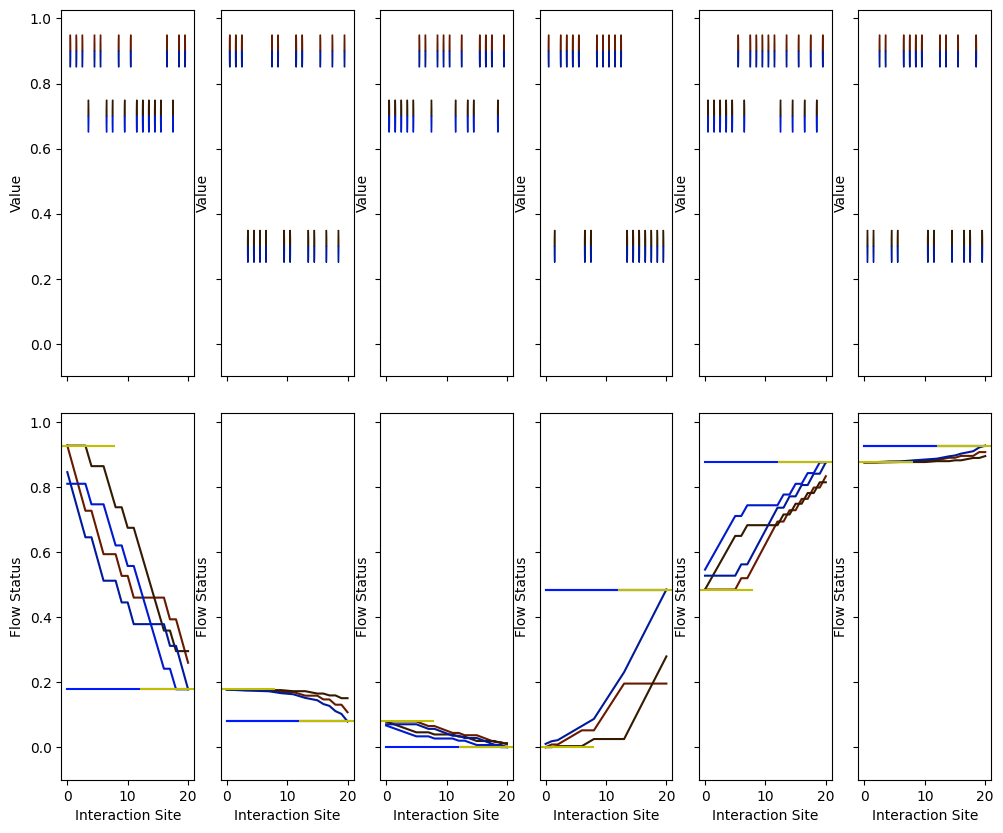

In [13]:
from allscatter import *
import numpy as np
import matplotlib.pyplot as plt

# Define a six-terminal system
# C1--M1--C2--M2--C3--M3--C4--M4--C5--M5--C6--M6--C1
# Total number of edge states: 4
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 2 (#2,#3)
#===============================================================
# General information for the system - Superparameters
totalNumMover = 5
numForwardMover = 2
zeroVoltTerminal = 3
#===============================================================
# Information of scattering events 
# Interaction parameters
v02 = 0.9
v13 = 0.7
v12 = 0.3
# Define interaction between nodes (contacts)
# C1--M1--C2
edgeDef1 = [[0,2,v02,10],[1,3,v13,10]]
# C2--M2--C3
edgeDef2 = [[0,2,v02,10],[1,2,v12,10]]
# C3--M3--C4
edgeDef3 = [[0,2,v02,10],[1,3,v13,10]]
# C4--M4--C5
edgeDef4 = [[0,2,v02,10],[1,2,v12,10]]
# C5--M5--C6
edgeDef5 = [[0,2,v02,10],[1,3,v13,10]]
# C6--M6--C1
edgeDef6 = [[0,2,v02,10],[1,2,v12,10]]
#================================================================
edgesDef = [edgeDef1,edgeDef2,edgeDef3,edgeDef4,edgeDef5,edgeDef6]
edgesInfo = []
for edgeDef in edgesDef:
    edgesInfo.append(generate_bynumber(edgeDef))

graph = []
for edgeInfo in edgesInfo:
    graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))

print("The transformation matrix between C1 and C2:")
print(graph[0].trans_mat())
print("===========================================================")   
nodesCurrent = [1,0,0,-1,0,0]
sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal)
#================================================================
# Your system has been defined, let us make some fun out of it.
print("Corresponding matrix for this system:")
print(sys.mastermat())
print("Its determinant is", np.linalg.det(sys.mastermat()))
print("===========================================================")
print("Its solutions for all terminal voltages:")
print(sys.solve())
axs=sys.plot()

#### Build a crossbar structure

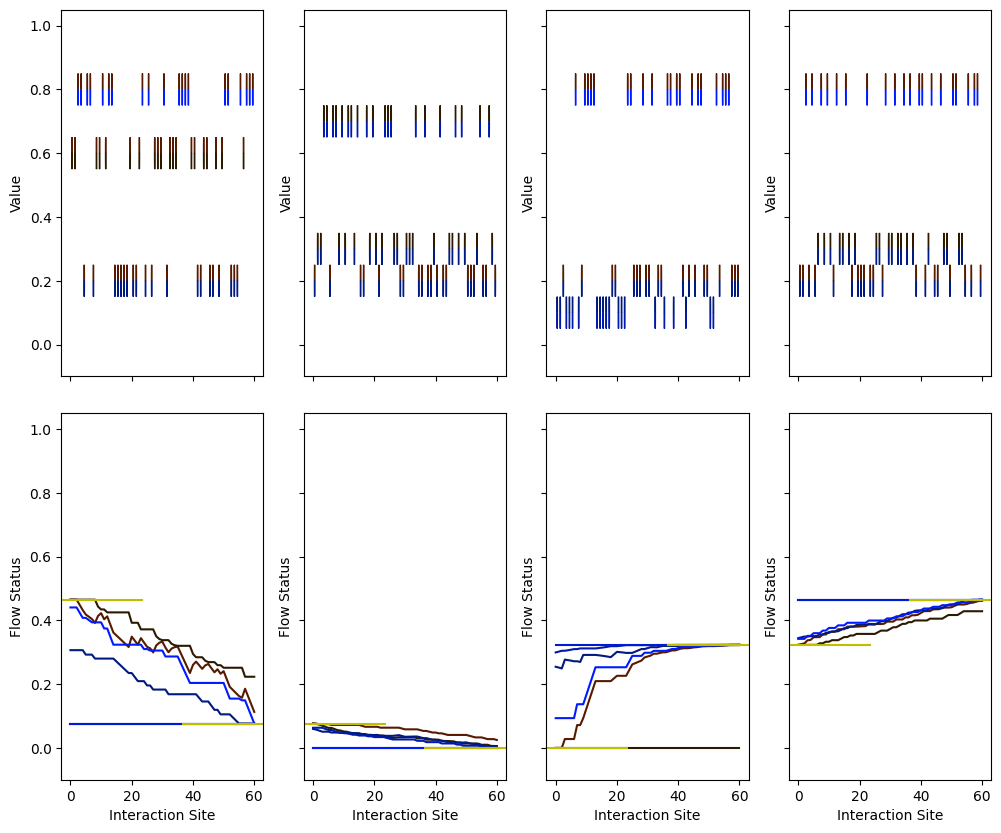

In [14]:
from allscatter import *
import numpy as np
import matplotlib.pyplot as plt

# Define a four-terminal system
# C1--M1--C2--M2--C3--M3--C4--M4--C1
# Total number of edge states: 4
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 2 (#2,#3)
#===============================================================
# General information for the system - Superparameters
totalNumMover = 6
numForwardMover = 2
zeroVoltTerminal = 2
#===============================================================
# Information of scattering events 
# Interaction parameters
v02 = 0.2
v12 = 0.3
v01 = 0.6
v23 = 0.1
v13 = 0.7
v05 = 0.8

numPerEdge = 20
# Define interaction between nodes (contacts)
# C1--M1--C2
edgeDef1 = [[0,2,v02,numPerEdge],[0,1,v01,numPerEdge],[0,5,v05,numPerEdge]]
# C2--M2--C3
edgeDef2 = [[0,2,v02,numPerEdge],[1,2,v12,numPerEdge],[1,3,v13,numPerEdge]]
# C3--M3--C4
edgeDef3 = [[0,2,v02,numPerEdge],[0,5,v05,numPerEdge],[2,3,v23,numPerEdge]]
# C4--M4--C1
edgeDef4 = [[0,2,v02,numPerEdge],[1,2,v12,numPerEdge],[0,5,v05,numPerEdge]]
#================================================================
edgesDef = [edgeDef1,edgeDef2,edgeDef3,edgeDef4]
edgesInfo = []
for edgeDef in edgesDef:
    edgesInfo.append(generate_bynumber(edgeDef))

graph = []
for edgeInfo in edgesInfo:
    graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))
nodesCurrent = [1,0,-1,0]
sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal)
axs = sys.plot()

#### Build a crossbar structure with a split-gate design

[[ 1.00054746e+00 -3.40856758e-05  0.00000000e+00 -1.00051337e+00]
 [-1.64090224e-01  1.64119607e-01 -2.93827429e-05  0.00000000e+00]
 [-6.44809460e-01 -3.55200979e-01  1.00053129e+00 -5.20851496e-04]
 [-5.13373881e-04  0.00000000e+00 -1.00052085e+00  1.00103423e+00]]
[1.00002575e+00 9.99858856e-01 0.00000000e+00 5.24520874e-04]


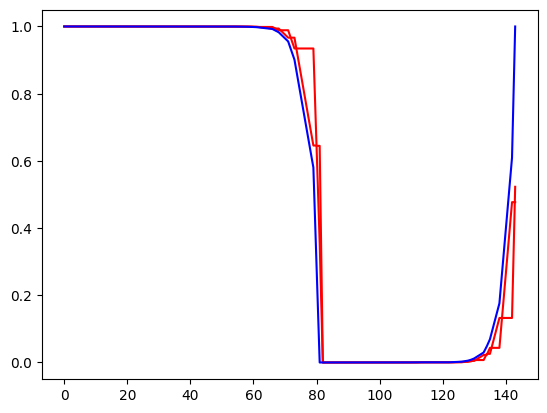

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from allscatter import *
# Define a four-terminal system comprising regions with different doping levels 
# (two or more top gates) Here we assume the system looks like:
# C1--M1--M2--C2--M3--M4--C3--M5--C4--M6--C1
# Total number of edge states: 3
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 1 (#2)
# In a differently doped region surrounding contact 2 (C2), only #0,#2 exist
#===============================================================
# General information for the system
m = 3
mf = 2
ground_terminal = 2
beta = 0.9
delta = 0.9
blocking_state = [[1,[1]]]
# The definition of blocking_state should strictly follow this rule: 
# [[index_of_terminal#1,[all blocked states in this terminal]],[[index_of_terminal#2,[all blocked states in this terminal],...]]]
#===============================================================
# Information for scattering events
message1 = [[0,2,beta,10],[1,2,delta,10]]
message2 = [[0,2,beta,10]] # #1 edge state does not exist here
message3 = [[0,2,beta,10]] # #1 edge state does not exist here
message4 = [[0,2,beta,10],[1,2,delta,10]]
message5 = [[0,2,beta,10],[1,2,delta,10]]
message6 = [[0,2,beta,10],[1,2,delta,10]]
#================================================================
messages = [message1+message2,message3+message4,message5,message6]
seqs = []
for message in messages:
    seqs.append(generate_bynumber(message))

matrices = []
for seq in seqs:
    matrices.append(effective_matrix(seq,m,mf))

current = [1,0,-1,0]
sys = system(current,matrices,mf,ground_terminal,blocking_state)
M = sys.mastermat()
print(M)
sys.voltage_plot(10)
print(sys.solve())

In [27]:
# if you want the same sequence (without randomized order) but with different values
message = [[0,2,beta*0.95,10],[2,1,beta*0.95,10]]
seq_copy = generate_bynumber(message)
print("Original sequence (First 10 elements to display):\n")
print(seq_copy[:10])
print("======================================================")
print("Modified sequence (First 10 elements to display):\n")
seq_copy[:,2] = 0.1
print(seq_copy[:10])

Original sequence (First 10 elements to display):

[[2.   1.   0.95]
 [0.   2.   0.95]
 [0.   2.   0.95]
 [2.   1.   0.95]
 [0.   2.   0.95]
 [2.   1.   0.95]
 [2.   1.   0.95]
 [0.   2.   0.95]
 [2.   1.   0.95]
 [2.   1.   0.95]]
Modified sequence (First 10 elements to display):

[[2.  1.  0.1]
 [0.  2.  0.1]
 [0.  2.  0.1]
 [2.  1.  0.1]
 [0.  2.  0.1]
 [2.  1.  0.1]
 [2.  1.  0.1]
 [0.  2.  0.1]
 [2.  1.  0.1]
 [2.  1.  0.1]]


In [23]:
def omegajkp(om1,om2,j,k,p):
    return np.dot(om1[j,:][:,k],om2[k,:][:,p]).sum()

print(M5)
print(M6)
print(omegajkp(M5,M6,[2],[0],[2]))
print(omegajkp(M5,M6,[2],[0],[2]))

[[1.88417214e-01 1.29727309e-01 6.81855477e-01]
 [4.03811544e-01 2.78047480e-01 3.18140976e-01]
 [4.07771243e-01 5.92225211e-01 3.54641924e-06]]
[[3.53672865e-01 2.07694992e-01 4.38632143e-01]
 [2.76344362e-01 1.62290015e-01 5.61365623e-01]
 [3.69982773e-01 6.30014993e-01 2.23431346e-06]]


0.17886157417086374